# Higher Education Means Higher Income Overall
### Male Wage Earners in Atlanta 2003 - 2009
By: Paulo Martinez

Prepared for ERPi, 12-2-2018

## Objective: Discuss the relationship between education and wages

Based on a dataset of 3,000 observations describing men’s incomes in Atlanta.

### First Thing's First: How Trustworthy is this data?
### It's unclear
DATA = dspe_wage.csv
It contains the following 11 variables:
- year: Year that wage information was recorded
- age: Age of worker
- maritl: A factor with levels 1. Never Married 2. Married 3. Widowed 4. Divorced and 5. Separated indicating marital status
- race: A factor with levels 1. White 2. Black 3. Asian and 4. Other indicating race
- education: A factor with levels 1. < HS Grad 2. HS Grad 3. Some College 4. College Grad and 5. Advanced Degree indicating education level
- region: Region of the country (mid-atlantic only)
- jobclass: A factor with levels 1. Industrial and 2. Information indicating type of job
- health: A factor with levels 1. <=Good and 2. >=Very Good indicating health level of worker
- health_ins: A factor with levels 1. Yes and 2. No indicating whether worker has health insurance
- logwage: Log of workers wage
- wage: Workers raw wage
- *'Unnamed: 0' - Most likely is the record identifier from the parent database. (see EDA notebook in parent directory)'*


# Finding 1: 
## ⚠️ The "timestamps" for 2003 & 2005 May have been mixed up. And we need to find out why. 

## Recommendation 1: Double check the process by which this data came to be.

### The Data came with an unexpected variable 'Unnamed: 0'. 
- ##### I suspect it is just the record numbers from the database this file was pulled from. 
- #### ⚠️ Nonethless it was unnanounced and it remains unclear if this was an (un)intentional data leak.
- #### These record identifiers also are the only clue that the year tags from 2003 may have been mixed up with those from 2005

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
wages_df = pd.read_csv('data/dspe_wage.csv')

**Notice** that the record numbers from the parent database are organized in descending order from 2003 - 2005, but in ascending order from 2006 - 2009. This might be explained because of a bug in the way the data queried.

**This also makes it unwise to rely on chronological analyses until the matter is resolved and presents a constraint on the analysis possible**

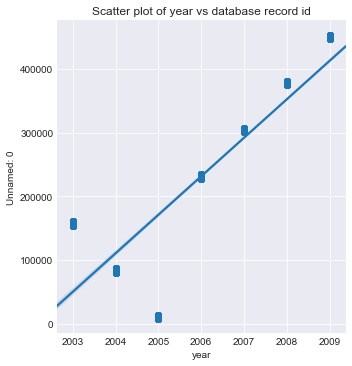

In [56]:
sns.lmplot(x = 'year', y = 'Unnamed: 0', data = wages_df)
plt.title('Scatter plot of year vs database record id')
plt.show()

The above plot is a scatter plot with an ordinary least square regression linear model showing the anticipated ascending order of record ids.

# Finding 2: 
- ## Workers who graduated highschool but never went to college are the largest group in this data
- ### Workers who graduated college are the second largest group
- #### They are followed closely by workers who went to but have not comopleted college
- **The next largest group are workers with advanced degrees** 
- And the smallest group are workers who did not graduate highschool

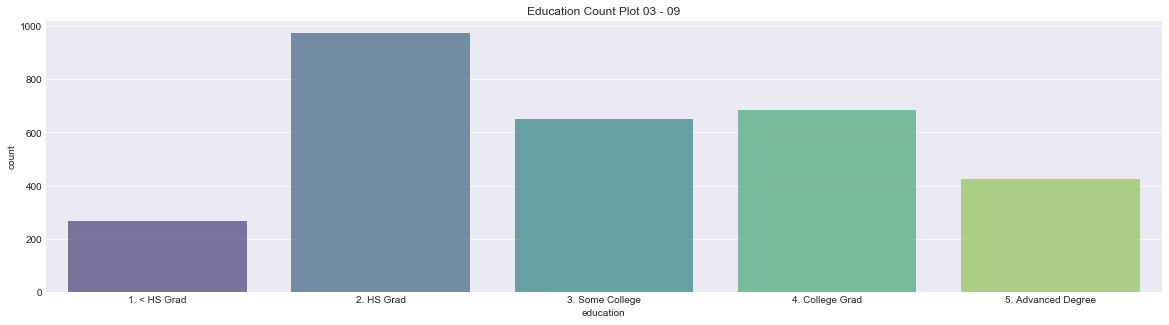

In [57]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (20, 5))
sns.countplot(x = 'education', 
              order = sorted(set(wages_df.education)),
              data = wages_df, 
              palette = 'viridis',
              alpha = .7
             )
plt.title('Education Count Plot 03 - 09')
plt.show()

# Finding 3:
## The median wage overall is 105 and the best way to summarize wages
- **There distributuion is skewed to the right, meaning the mean wage will be biased to be a bit higher**
- The data reflects a 95% confidence interval for the grand median between:

[104.46323322, 106.92181409]

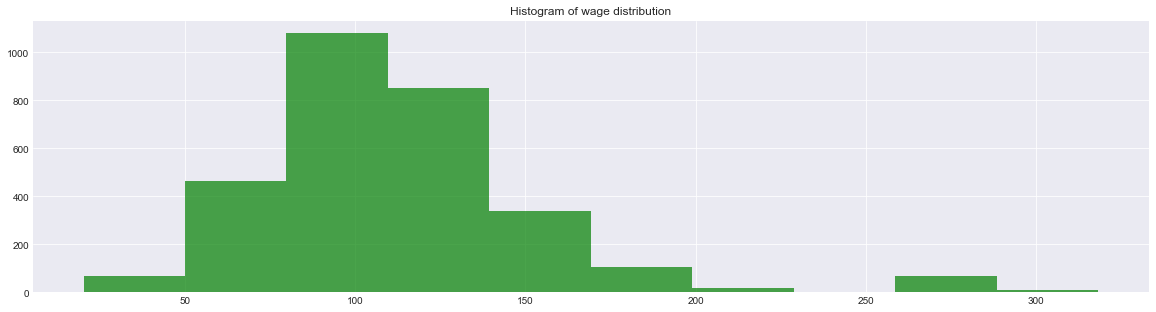

In [58]:
f, ax = plt.subplots(figsize = (20, 5))
wages_df.wage.hist(color = 'green', alpha = .7)
plt.title('Histogram of wage distribution')
plt.show()

In [59]:
print(wages_df.wage.describe())

count    3000.000000
mean      111.703608
std        41.728595
min        20.085537
25%        85.383940
50%       104.921507
75%       128.680488
max       318.342430
Name: wage, dtype: float64


# Finding 4:
- ## An advanced degree improves your odds, but is no guarantee of earning more than 100 or even 50
- ## But the absence of a highschool diploma is an invisible wall keeping wages under 150; most of them under 100.

No handles with labels found to put in legend.


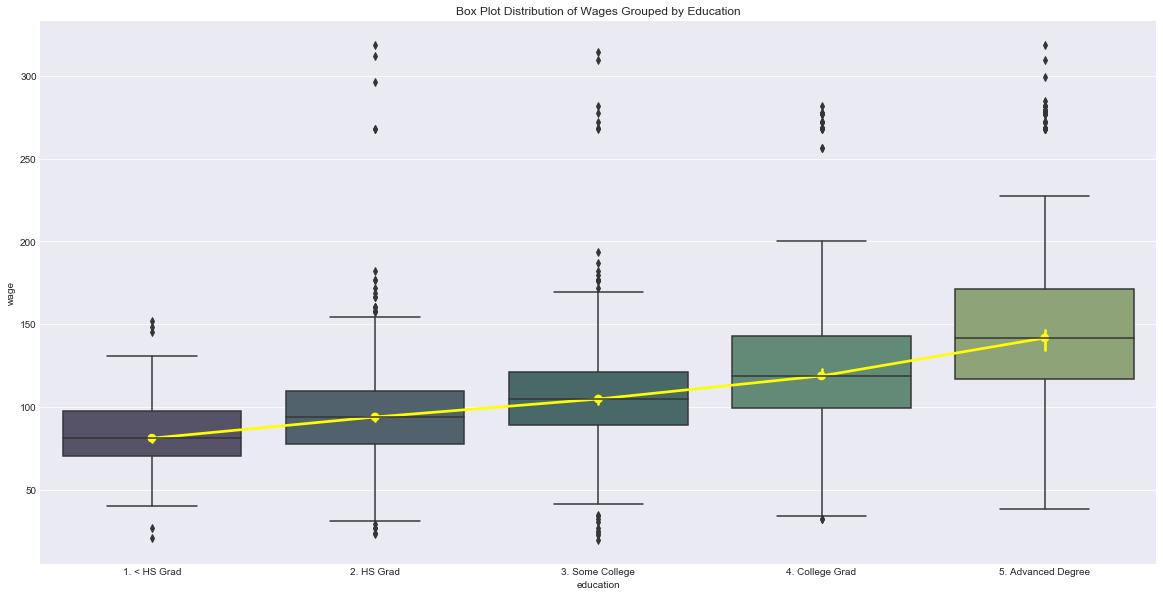

In [63]:
f, ax = plt.subplots(figsize = (20, 10))
#sns.swarmplot(x = 'education', palette = 'viridis',y = 'wage', data = wages_df, order = sorted(set(wages_df.education)),edgecolor = 'white',linewidth = .7,)
sns.boxplot(x = 'education', palette = 'viridis',y = 'wage', data = wages_df, order = sorted(set(wages_df.education)),saturation = .3,)
sns.pointplot(x = 'education', y = 'wage', data = wages_df, color = 'yellow', estimator = np.median, order = sorted(set(wages_df.education)))
plt.title('Box Plot Distribution of Wages Grouped by Education')
plt.legend()
plt.show()

**What this plot shows:** Each "Box and whiskers" plot shows the summary statistics for the wage distribution. 
- The horizontal line in the middle of the box represents the mean of the distribution
- the filled-in rectangels below and above the mean are the 25% - 75% inter-quartile range
- and the horizontal lines above and below that represent the bottom and top quartiles
- the diamonds above and below the quartiles represent outliers in that distribution.

### The median income for '1. < HS Grad' is: 81
With a 95% confidence interval of
[79.12368356 82.6796373 ]

### The median income for '2. HS Grad' is about 13 higher at: 94
With a 95% confidence interval of
[91.69922611 94.07271475]

### The median income for '3. Some College' is about 11 higher at: 105
With a 95 % confidence interval of
[101.82435208 106.92181409]

### The median income for '4 College Grad' is about 14 higher at: 119
With a 95% confidence interval of
[118.01975334 123.08969985]

### The median income for '5. Advanced Degree' is 21 higher at: 142
With a 95% confidence interval of 
[134.70537512 145.80321985]

# And these differences in median income for each educational population have been validated using Mood's median test (a special application of the chi-squared statistic).

## The odds of the education not being a predictor of median wage but still looking the way it does in this data as a fluke are astronomically low: 7.530594260145932e-116

- However more analysis is required to determine what this means for the confidence interval.
    - Since the wage distributions were decidedly not normal. I had to use a different test of the significance of each median value than the more common z-tests or t-tests.

In [54]:
# list comprehension to generate and populate new column
wages_df['ed_numeric'] = [int(v[0]) for v in wages_df.education]

# the stat used is Pearson's chi-squared statistic.
from scipy.stats import median_test
stat, p, med, tbl = median_test(
    wages_df.wage[wages_df.ed_numeric == 1], 
    wages_df.wage[wages_df.ed_numeric == 2],
    wages_df.wage[wages_df.ed_numeric == 3],
    wages_df.wage[wages_df.ed_numeric == 4],
    wages_df.wage[wages_df.ed_numeric == 5],
)
print('grand med:', med)
print('')
print('sample-values\n', 'above, below')
print(tbl)
print('')
print(stat)
print('p: ', p)
print('p-value: the probability of getting our stat when all the arrays actually have the same median')

grand med: 104.921506533664

sample-values
 above, below
[[ 46 302 312 464 359]
 [222 669 338 221  67]]

541.3710842640019
p:  7.530594260145932e-116
p-value: the probability of getting our stat when all the arrays actually have the same median


For a more detailed look at the work and methodology producing these results please consult the other notebooks in this repo: 